# **Lab 2**
### Weightage 3%
## Linear Regression
---
Dataset used: 
  ACS Flammability Limit Computation

---



Maximum Points in the Lab: 65

---
Important points to remember :


1.  Observations for the experiments should be explained.
2. All the code should be submitted in the form of a single Jupyter notebook itself.
3. Points for each sub-section are mentioned in the appropriate question.
4. Make sure to begin early as a few experiments may consume more time to run.
5. You can use Google colab to run in jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)
6. The lab must be submitted on Google classroom. The code as well as the accompanying observations should be made part of the python notebook.
7. **Code Readability** is very important. Hence use self explanatory variable names and add comments to describe your approach wherever necessary.
8. You are expected to submit your **detailed inferences** and not just an error free code.
9. The lab is due on **Feb 21st 11.59pm**.
10. The lab should be completed **individually**. Students are expected to follow the **honor code** of the class.




In [ ]:
# Import necessary libraries

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Describe the arguments and output of the linear regression function call in sklearn package.



---
**5 Points** 


---
**ATTRIBUTES**

**fit_intercept :-** (bool default True)
Whether or not to calculate the intercept for this model. If set to False, intercept will be taken as 0.

**normalize :-** (bool default False)
If True, X will be normalized before regression by subtracting the mean and dividing by the l2-norm.

**copy_X :-** (bool default True)
If True, X will be copied; else, it may be overwritten.

**n_jobs :-** (int or None)
The number of jobs to use for the computation.

LinearRegression() returns a linear regression object according to the given parameters

**METHODS**

**fit(self, X, y, sample_weight=None) :-** Fits the linear model with the help of the data provided.

**predict(self, X) :-** Gives predictions for X provided. Returns an array of prediction values

**score(self, X, y, sample_weight=None) :-** returns the R^2 score(Float type)


We will be using the ACS flammability limit computation dataset for linear regression task. The dataset contains 105 molecular properties of few chemical compounds from which Flammability Limit is to be computed. The following block contains code to read the excel file from the given URL and preprocess the data. **Please don't make any changes to the block below.**

In [ ]:

# Load the dataset onto a data frame. !! Please dont make any changes !!
url = "https://ndownloader.figshare.com/files/18729491"
data_frame = pd.read_excel(url,encoding='latin-1',skiprows=5)

# Necessary attributes converted to numpy arrays
target = data_frame.iloc[:,4].to_numpy()
input_features = data_frame.iloc[:,6:].to_numpy()


We have input attributes and output vector ready. Now the first step is to split the entire dataset into training and test subsets. sklearn package provides you a flexible way of doing this. All you need to do is just specify input attributes array, target array and fraction of the test set. Once the split is done, we are ready to train the model and evaluate it. 

- We would like you to experiment with different test set fractions and comment on how well the model is able to estimate the target value for new test instances? 

- Also there is another flexibility to tune the intercept term on or off. We would like you to experiment on those possibilities as well.

**Note:** Don't forget to explicitly normalize the attributes.

---


**10 Points** 

---



In [ ]:
# normalizing the data set

from sklearn.preprocessing import normalize

y = target.reshape((-1,1))

X_normalized_features = normalize(input_features, axis = 0)
X_normalized_samples = normalize(input_features, axis = 1)
y_normalized = normalize(y, axis = 0)

y_max = max(y)
y_min = min(y)

In [ ]:
# 1. Using the original input_variables and target values

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

test_size_fractions = [0.2,0.3,0.4,0.5]

mse_list_original = []

# Step 1: Create a linear regressor object 
# Insert your code below
regressor_with_intercept = LinearRegression()

# Step 2: Create a linear regressor object forcing bias or intercept as 0
# Insert your code below
regressor_no_intercept = LinearRegression(fit_intercept = False)

# Experiment with 8 different model setup

for fraction in test_size_fractions:
    
    
    # Step 3: Split into train and test set based on the fraction
    # Insert your code below
    X_train, X_test, y_train, y_test = train_test_split(input_features, target, test_size = fraction, random_state = 42)

    # Step 4(a): Train the Intercept Linear Regression model using held out training set
    # Insert your code below
    regressor_with_intercept.fit(X_train, y_train)

    # Step 4(b): Predict the target values using the trained model for test set instances
    # Insert your code below
    y_test_predictions_1 = regressor_with_intercept.predict(X_test)

    # Step 4(c): Print the mean squared error of the model on test data set. Store this value to mse list to find the best model setting.
    # Insert your code below
    final_loss_1 = mean_squared_error(y_test, y_test_predictions_1)
    mse_list_original.append(final_loss_1)
    print('With intercept, fraction ' + str(fraction) + ' MSE = ' + str(final_loss_1))

    # Step 5(a): Train the Non Intercept Linear Regression model using held out training set
    # Insert your code below
    regressor_no_intercept.fit(X_train, y_train)

    # Step 5(b): Predict the target values using the trained non intercept for test set instances
    # Insert your code below
    y_test_predictions_2 = regressor_no_intercept.predict(X_test)

    # Step 5(c): Print the mean squared error of the non intercept model on test data set. Store this value to mse list to find the best model setting.
    # Insert your code below
    final_loss_2 = mean_squared_error(y_test, y_test_predictions_2)
    mse_list_original.append(final_loss_2)
    print('Without intercept, fraction ' + str(fraction) + ' MSE = ' + str(final_loss_2))


With intercept, fraction 0.2 MSE = 0.0858292140362414
Without intercept, fraction 0.2 MSE = 0.18274993369871623
With intercept, fraction 0.3 MSE = 0.10516608109969937
Without intercept, fraction 0.3 MSE = 0.22601866092166925
With intercept, fraction 0.4 MSE = 0.15767198520486844
Without intercept, fraction 0.4 MSE = 0.38801607113411896
With intercept, fraction 0.5 MSE = 0.12733412702050131
Without intercept, fraction 0.5 MSE = 0.3176483326334792


In [ ]:
# 2. Using the normalized input on features and output values

test_size_fractions = [0.2,0.3,0.4,0.5]

mse_list_normal_features = []

# Step 1: Create a linear regressor object 
# Insert your code below
regressor_with_intercept = LinearRegression()

# Step 2: Create a linear regressor object forcing bias or intercept as 0
# Insert your code below
regressor_no_intercept = LinearRegression(fit_intercept = False)

# Experiment with 8 different model setup

for fraction in test_size_fractions:
    
    
    # Step 3: Split into train and test set based on the fraction
    # Insert your code below
    X_train, X_test, y_train, y_test = train_test_split(X_normalized_features, target, test_size = fraction, random_state = 42)


    # Step 4(a): Train the Intercept Linear Regression model using held out training set
    # Insert your code below
    regressor_with_intercept.fit(X_train, y_train)

    # Step 4(b): Predict the target values using the trained model for test set instances
    # Insert your code below
    y_test_predictions_1 = regressor_with_intercept.predict(X_test)

    # Step 4(c): Print the mean squared error of the model on test data set. Store this value to mse list to find the best model setting.
    # Insert your code below
    final_loss_1 = mean_squared_error(y_test, y_test_predictions_1)
    mse_list_normal_features.append(final_loss_1)
    print('With intercept, fraction ' + str(fraction) + ' MSE = ' + str(final_loss_1))

    # Step 5(a): Train the Non Intercept Linear Regression model using held out training set
    # Insert your code below
    regressor_no_intercept.fit(X_train, y_train)

    # Step 5(b): Predict the target values using the trained non intercept for test set instances
    # Insert your code below
    y_test_predictions_2 = regressor_no_intercept.predict(X_test)

    # Step 5(c): Print the mean squared error of the non intercept model on test data set. Store this value to mse list to find the best model setting.
    # Insert your code below
    final_loss_2 = mean_squared_error(y_test, y_test_predictions_2)
    mse_list_normal_features.append(final_loss_2)
    print('Without intercept, fraction ' + str(fraction) + ' MSE = ' + str(final_loss_2))


With intercept, fraction 0.2 MSE = 1.6086939175280427e+24
Without intercept, fraction 0.2 MSE = 6.854546440543806e+22
With intercept, fraction 0.3 MSE = 9.489015270014045e+21
Without intercept, fraction 0.3 MSE = 8.727066358649256e+24
With intercept, fraction 0.4 MSE = 3.2702226671685005e+24
Without intercept, fraction 0.4 MSE = 6.527728997020021e+24
With intercept, fraction 0.5 MSE = 6.098971594530579e+24
Without intercept, fraction 0.5 MSE = 9.910156024630938e+21


In [ ]:
# 3. Using the Normalized features on samples and target values

test_size_fractions = [0.2,0.3,0.4,0.5]

mse_list_normal_samples = []

# Step 1: Create a linear regressor object 
# Insert your code below
regressor_with_intercept = LinearRegression()

# Step 2: Create a linear regressor object forcing bias or intercept as 0
# Insert your code below
regressor_no_intercept = LinearRegression(fit_intercept = False)

# Experiment with 8 different model setup

for fraction in test_size_fractions:
    
    
    # Step 3: Split into train and test set based on the fraction
    # Insert your code below
    X_train, X_test, y_train, y_test = train_test_split(X_normalized_samples, target, test_size = fraction, random_state = 42)


    # Step 4(a): Train the Intercept Linear Regression model using held out training set
    # Insert your code below
    regressor_with_intercept.fit(X_train, y_train)

    # Step 4(b): Predict the target values using the trained model for test set instances
    # Insert your code below
    y_test_predictions_1 = regressor_with_intercept.predict(X_test)

    # Step 4(c): Print the mean squared error of the model on test data set. Store this value to mse list to find the best model setting.
    # Insert your code below
    final_loss_1 = mean_squared_error(y_test, y_test_predictions_1)
    mse_list_normal_samples.append(final_loss_1)
    print('With intercept, fraction ' + str(fraction) + ' MSE = ' + str(final_loss_1))

    # Step 5(a): Train the Non Intercept Linear Regression model using held out training set
    # Insert your code below
    regressor_no_intercept.fit(X_train, y_train)

    # Step 5(b): Predict the target values using the trained non intercept for test set instances
    # Insert your code below
    y_test_predictions_2 = regressor_no_intercept.predict(X_test)

    # Step 5(c): Print the mean squared error of the non intercept model on test data set. Store this value to mse list to find the best model setting.
    # Insert your code below
    final_loss_2 = mean_squared_error(y_test, y_test_predictions_2)
    mse_list_normal_samples.append(final_loss_2)
    print('Without intercept, fraction ' + str(fraction) + ' MSE = ' + str(final_loss_2))


With intercept, fraction 0.2 MSE = 3.964918025922237e+20
Without intercept, fraction 0.2 MSE = 0.07303269019177201
With intercept, fraction 0.3 MSE = 4.498524370896273e+20
Without intercept, fraction 0.3 MSE = 0.07677604148719748
With intercept, fraction 0.4 MSE = 0.09571231140037624
Without intercept, fraction 0.4 MSE = 0.11009041444307918
With intercept, fraction 0.5 MSE = 6.724576667732859e+19
Without intercept, fraction 0.5 MSE = 0.16195835624983348


In the previous block you have experimented with different settings of the Linear Regression model. You have test set mean squared error stored. Figure out which setting gave the least mean squared error. 

---

**5 Points**

---




In [ ]:
# Insert your code to identify the best fraction and intercept requirement. Also, print the best setting chosen.

# 1. Checking the best normalization setting

print('Mean MSE original values ', np.mean(mse_list_original))
print('Mean MSE normalized feature values ', np.mean(mse_list_normal_features))
print('Mean MSE normalized samples values ', np.mean(mse_list_normal_samples))

Mean MSE original values  0.19880430071866179
Mean MSE normalized feature values  3.29007852132456e+24
Mean MSE normalized samples values  1.1419875079489744e+20


In [ ]:
# 2. Best fraction and intercept requirement

mse_min = min(mse_list_original)

ind = mse_list_original.index(mse_min)
print(ind)
final_intercept = False

final_fraction = 0.2

if ind%2 == 0:
    final_intercept = True

if ind/2 == 1:
    final_fraction = 0.3
elif ind/2 == 2:
    final_fraction = 0.4
elif ind/2 == 3:
    final_fraction = 0.5

print(final_intercept)
print(final_fraction)

0
True
0.2


**Reason for the best model**

The best model was found to be the one with original values with 0.2 train_test_split with intercept calculation. The fraction value and the intercept status were expected as with more training data we can model the same dataset more accurately, leading to less errors. Also since we have not standardized and the data is not centered, it intercept calculation seems a better option.

The unexpected part is that the original values give the best output. It seems as if the normalized data do not capture the relationship in the data that is present in the original data. Normalization across a sample performs better than across a feature. The feature normalized values might mot be able to capture the relationship in one input vector 

The fit with the original values has been taken as the best although one setting of the normalization across samples gives a lower MSE, there still exist settings in which the error exceeds 10^20

Now that you have figured out the best model setting, use that setting to train the model to predict test instances.


---

**3 Points**


---



In [ ]:
# Step 1: Split the entire dataset into train and test set based on the best fraction
# Insert your code below
X_train, X_test, y_train, y_test = train_test_split(input_features, target, test_size = final_fraction, random_state = 42)

# Step 2: Create a linear regressor object with intercept turned on or off as per best model setting
# Insert your code below
regressor_with_intercept = LinearRegression(fit_intercept=final_intercept)

# Step 3(a): Train the Linear Regression model using training set
# Insert your code below
regressor_with_intercept.fit(X_train, y_train)

# Step 3(b): Predict the target values using the trained model for test set instances
# Insert your code below
y_test_predictions = regressor_with_intercept.predict(X_test)

# Step 3(c): Print the mean squared error of the model on test set. 
# Insert your code below
final_loss = mean_squared_error(y_test, y_test_predictions)
print(final_loss)

0.0858292140362414


Now check the goodness of the model with repsect to prediction on test instances. The aim is to predict the target values for test instances using the trained model. These values would be plotted against the true values of the test instances. A good model would yield a plot that looks *close to a line of slope 45 degree*. **Comment** on the goodness of the learned model using this test.

---

**5 points** 

---







<function matplotlib.pyplot.show>

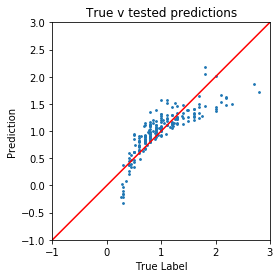

In [ ]:
# Insert your code to plot true vs predicted test values
line = [-2,-1, 1, 2, 3]  # for plotting the 45 degree line

plt.scatter(y_test, y_test_predictions, s = np.pi*1 )
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(line, line, color = 'red')
plt.title('True v tested predictions')
plt.xlabel('True Label')
plt.ylabel('Prediction')
plt.show


**COMMENT ON THE GOODNESS**

Although the data seems curved than a 45 degree line, however the points do seem close to that line. Apart from a few outliers, the true and predicted labels are pretty close to each other

You have implemented simple linear regression. You may apply regularization techniques that constrain the coefficients. We will be seeing 2 types of regularized regression techniques:


1.   Ridge Regression
2.   Lasso Regression



# Ridge Regression

---

Describe the arguments and output of the Ridge regression function call in sklearn package.



---
**5 Points** 


---

**PARAMETERS**

**alpha(float, default=1.0) :-**
Regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates.

**fit_intercept(bool, default=True):-**
Whether to calculate the intercept for this model. If set to false, no intercept willbe used in calculations.

**normalize (bool, default=False):-**
If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm.

**copy_X (bool, default=True) :-**
If True, X will be copied; else, it may be overwritten.

**max_iter (int, default=None) :-**
Maximum number of iterations for conjugate gradient solver.

**tol (float, default=1e-3) :-**
Tolerance for the precision of the solution.

**solver (default='auto') :-**
Solver to use in the computational routines.

**random_state (int, RandomState instance, default=None) :-**
The seed of the pseudo random number generator to use when shuffling the data.

Returns a ridge regressor object.

**METHODS**

**fit(self, X, y, sample_weight=None) :-** Fits the linear model with the help of the data provided.

**predict(self, X) :-** Gives predictions for X provided. Returns an array of prediction values

**score(self, X, y, sample_weight=None) :-** returns the R^2 score(Float type)





In ridge regression, L-2 regularization is applied to the coefficients. You have a hyperparameter alpha which you can vary to control the extent of constraining the coefficients. We would like you to experiment with different values of alpha and comment on the model performance. You may use the best setting of Linear Regression to Ridge Regression also. **Comment** on the effect of the alpha value on the mean squared error.


---

**9 Points**


---



0.08582595578504242
0.08583997985292101
0.08577324026507387
0.08547643328686323
0.08507780120002198
0.08480642368078638
0.08461906728653223
0.08448827044085874
0.08439713847193056
0.08433476798970439
0.08429379317906875


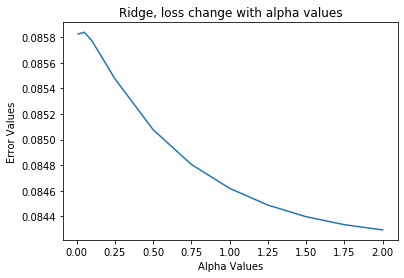

In [ ]:
from sklearn.linear_model import Ridge

alpha_values = [0.01,0.05,0.1,0.25,0.5,0.75,1,1.25,1.5,1.75,2]
error_list = []

# Step 1: Split into train and test set based on the best fraction
# Insert your code below
X_train, X_test, y_train, y_test = train_test_split(input_features, target, test_size = final_fraction, random_state = 42)

for alpha_ in alpha_values:


    # Step 2: Create a Ridge regressor object with desired alpha value
    # Insert your code below
    ridge_regressor = Ridge(alpha = alpha_, fit_intercept=final_intercept)

    # Step 3(a): Train the Ridge Regression model using training set
    # Insert your code below
    ridge_regressor.fit(X_train, y_train)

    # Step 3(b): Predict the target values using the trained Ridge model for test set instances
    # Insert your code below
    y_test_predictions = ridge_regressor.predict(X_test)

    # Step 3(c): Print the mean squared error of the model on test set. Add it to an error list to plot later.
    # Insert your code below
    final_loss_ridge = mean_squared_error(y_test, y_test_predictions)
    print(final_loss_ridge)
    error_list.append(final_loss_ridge)

# Step 4: Plot a graph of different alpha values of ridge regression versus mean squared error

plt.plot(alpha_values, error_list)
plt.title('Ridge, loss change with alpha values')
plt.xlabel('Alpha Values')
plt.ylabel('Error Values')
plt.show()


**OBSERVATIONS** :- 
With an increasing value of alpha the error value drops. However the difference in the drop becomes smaller each time. This is expected as Ridge regression reduce the extent of overfitting by regularization. However, there can be a value for which the loss starts increasing again, as a result of penalizing the weights too much.

# Lasso Regression

---

Describe the arguments and output of the Lasso regression function call in sklearn package.



---
**5 Points** 


---

**PARAMETERS**

**alpha(float, default=1.0) :-**
Regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates.

**fit_intercept(bool, default=True):-**
Whether to calculate the intercept for this model. If set to false, no intercept willbe used in calculations.

**precompute (True False default=False) :-**
Whether to use a precomputed Gram matrix to speed up calculations.The Gram matrix can also be passed as argument.

**normalize (bool, default=False):-**
If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm.

**warm_start (bool) :-**
When set to True, reuse the solution of the previous call to fit as initialization.

**positive (bool, optional) :-**
When set to True, forces the coefficients to be positive.

**copy_X (bool, default=True) :-**
If True, X will be copied; else, it may be overwritten.

**max_iter (int, default=None) :-**
Maximum number of iterations for conjugate gradient solver.

**tol (float, default=1e-3) :-**
Tolerance for the precision of the solution.

**solver (default='auto') :-**
Solver to use in the computational routines.

**random_state (int, RandomState instance, default=None) :-**
The seed of the pseudo random number generator to use when shuffling the data.

**selection (str, default ‘cyclic’) :-**
If set to ‘random’, a random coefficient is updated every iteration rather than looping over features sequentially by default.

Returns a lasso regressor object.

**METHODS**

**fit(self, X, y, sample_weight=None) :-** Fits the linear model with the help of the data provided.

**predict(self, X) :-** Gives predictions for X provided. Returns an array of prediction values

**score(self, X, y, sample_weight=None) :-** returns the R^2 score(Float type)




In Lasso regression, L-1 regularization is applied to the coefficients. You have a hyperparameter alpha which you can vary to control the extent of constraining the coefficients. We would like you to experiment with different values of alpha and **comment** on the model performance. You may use the best setting of Linear Regression to Lasso Regression also.

---

**9 Points**

---



0.08774810322238126
0.08791898465277806
0.0933842970936467
0.10605282144112084
0.13291101882280332
0.1530903854529497
0.1625139365143653
0.16567648984513966
0.1702554203972738
0.17625072817076765
0.18366241316562115


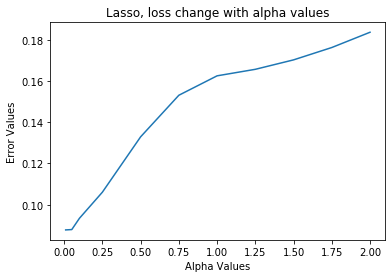

In [ ]:
from sklearn.linear_model import Lasso

alpha_values = [0.01,0.05,0.1,0.25,0.5,0.75,1,1.25,1.5,1.75,2]
error_list = []

# Step 1: Split into train and test set based on the best fraction
# Insert your code below
X_train, X_test, y_train, y_test = train_test_split(input_features, target, test_size = final_fraction, random_state = 42)

for alpha_ in alpha_values:

    # Step 2: Create a LASSO regressor object with desired alpha value
    # Insert your code below
    lasso_regressor = Lasso(alpha=alpha_, fit_intercept=final_intercept)
   

    # Step 3(a): Train the LASSO Regression model using training set
    # Insert your code below
    lasso_regressor.fit(X_train, y_train)

    # Step 3(b): Predict the target values using the trained LASSO model for test set instances
    # Insert your code below
    y_test_predictions = lasso_regressor.predict(X_test)

    # Step 3(c): Print the mean squared error of the model on test set. Add it to an error list to plot later.
    # Insert your code below
    final_loss_lasso = mean_squared_error(y_test, y_test_predictions)
    print(final_loss_lasso)
    error_list.append(final_loss_lasso)


# Step 4: Plot a graph of different alpha values of lasso regression versus mean squared error

plt.plot(alpha_values, error_list)
plt.title('Lasso, loss change with alpha values')
plt.xlabel('Alpha Values')
plt.ylabel('Error Values')
plt.show()


**OBSERVATIONS:-** We see an increase in the mse loss as we increase alpha for lasso regression. It might be due to the fact that LASSO also acts as a feature selector, tuning some weights to zero when there actually could have been a relationship/correlation between that feature and the output value. Hence we see that in this case Ridge performs better as it is able to capture those correlations which Lasso can't

Now since you have tried LASSO with different alpha values, you may try different number of maximum iterations associated with LASSO and **comment** on its effect on the mean squared error.


---

**9 Points**

---



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.16973021236882, tolerance: 0.0201166147402188
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.06977290044913, tolerance: 0.0201166147402188
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.90761531099376, tolerance: 0.0201166147402188
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.773072

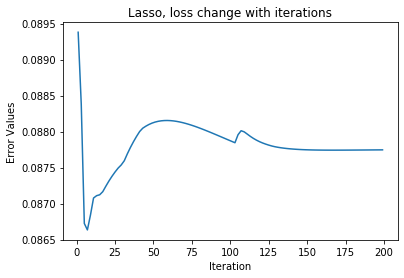

In [ ]:
error_list = []
alpha_ = 0.01
iter_list = []

# Step 1: Split into train and test set based on the best fraction
# Insert your code below
X_train, X_test, y_train, y_test = train_test_split(input_features, target, test_size = final_fraction, random_state = 42)

for m_iterations in range(1,200,2):
    

    # Step 2: Create a LASSO regressor object with desired number of iterations
    # Insert your code below
    lasso_regressor = Lasso(alpha=alpha_, fit_intercept=final_intercept, max_iter=m_iterations)

    # Step 3(a): Train the LASSO Regression model using training set
    # Insert your code below
    lasso_regressor.fit(X_train, y_train)

    # Step 3(b): Predict the target values using the trained LASSO model for test set instances
    # Insert your code below
    y_test_predictions = lasso_regressor.predict(X_test)

    # Step 3(c): Print the mean squared error of the model on test set. Add it to an error list to plot later.
    # Insert your code below
    final_loss_lasso = mean_squared_error(y_test, y_test_predictions)
    error_list.append(final_loss_lasso)
    iter_list.append(m_iterations)


#import warnings
#warnings.filterwarnings('ignore')

# Step 4: Plot a graph of different iteration values of lasso regression versus mean squared error

plt.plot(iter_list, error_list)
plt.title('Lasso, loss change with iterations')
plt.xlabel('Iteration')
plt.ylabel('Error Values')
plt.show()


**OBSERVATIONS:-**

The best value for lasso was obtained at 0.01. Hence, that was used for this experiment. The loss initially drops as the gradient descent happens. After a point the model starts overfitting on the data so the test error swings up again. Due to regularization the curve starts decreasing once again and converges to a final value.

NOTE :- We get the warnings because the model did not converge in the m_iterations allowed, which was meant to happen. Can use the ignore warning option to remove it.

import warnings

warnings.filterwarnings('ignore')